In [18]:
import pandas as pd

df = pd.read_csv('C:\\Users\\Vc682\\Downloads\\desmatamento\\desmatamento_prodes.csv')
df.columns = df.columns.str.strip()
df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)
print(df)

    referencia  acre  amazonas  amapa  maranhao  mato_grosso  para  rondonia  \
0         1988   620      1510     60      2450         5140  6990      2340   
1         1989   540      1180    130      1420         5960  5750      1430   
2         1990   550       520    250      1100         4020  4890      1670   
3         1991   380       980    410       670         2840  3780      1110   
4         1992   400       799     36      1135         4674  3787      2265   
5         1993   482       370      0       372         6220  4284      2595   
6         1994   482       370      0       372         6220  4284      2595   
7         1995  1208      2114      9      1745        10391  7845      4730   
8         1996   433      1023      0      1061         6543  6135      2432   
9         1997   358       589     18       409         5271  4139      1986   
10        1998   536       670     30      1012         6466  5829      2041   
11        1999   441       720      0   

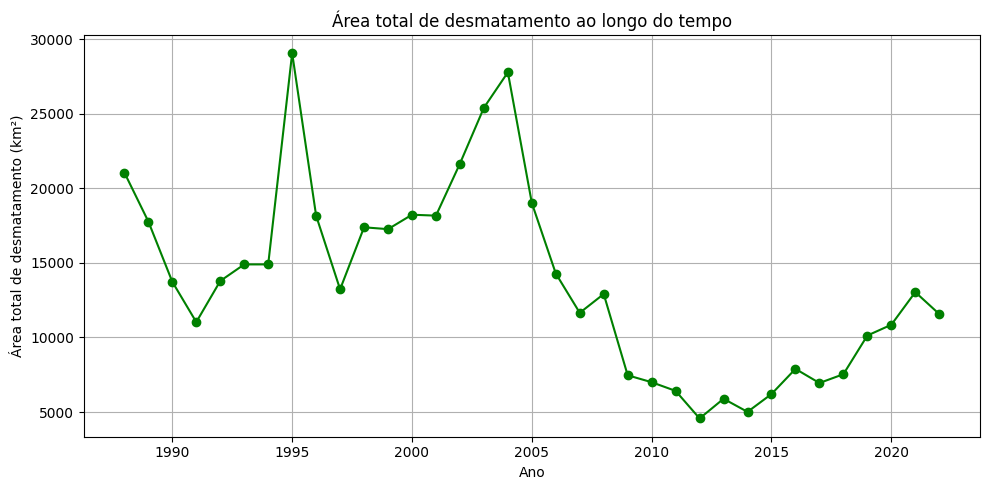

In [8]:
import pandas as pd
import matplotlib.pyplot as plt


df = pd.read_csv('C:\\Users\\Vc682\\Downloads\\desmatamento\\desmatamento_prodes.csv')
area_desmatamento_tempo = df.groupby('referencia')['area_total_desmatamento'].sum()
plt.figure(figsize=(10, 5))
area_desmatamento_tempo.plot(kind='line', marker='o', color='green')
plt.title('Área total de desmatamento ao longo do tempo')
plt.xlabel('Ano')
plt.ylabel('Área total de desmatamento (km²)')
plt.grid(True)
plt.tight_layout()
plt.show()

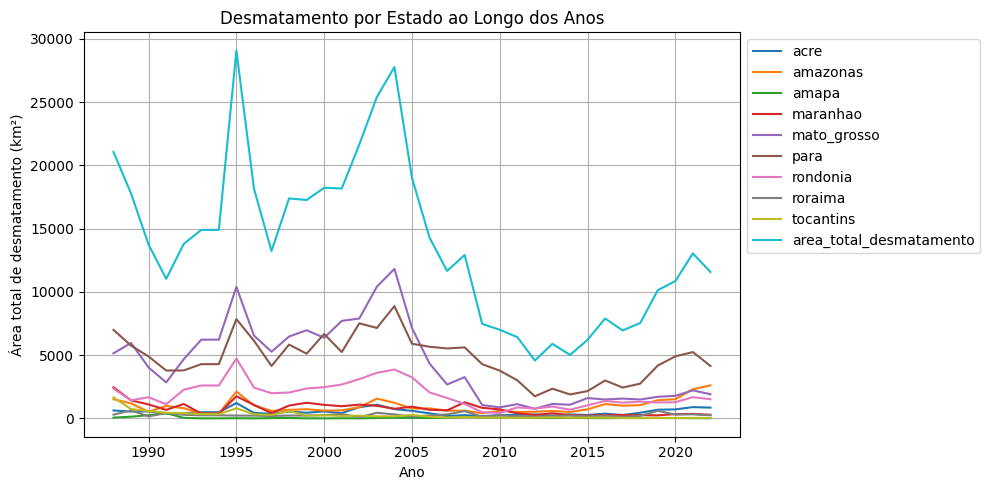

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('C:\\Users\\Vc682\\Downloads\\desmatamento\\desmatamento_prodes.csv')
df.set_index('referencia', inplace=True)
df_transposto = df.T
plt.figure(figsize=(10, 5))
for estado in df_transposto.index:
    plt.plot(df_transposto.columns, df_transposto.loc[estado], label=estado)
plt.title('Desmatamento por Estado ao Longo dos Anos')
plt.xlabel('Ano')
plt.ylabel('Área total de desmatamento (km²)')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.tight_layout()
plt.show()

c:\Users\Vc682\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Previsões SARIMA:
2023: 11754.87581133682
2024: 13471.098357321267

Previsões ARIMA:
2023: 11172.582530662423
2024: 11310.101970369811


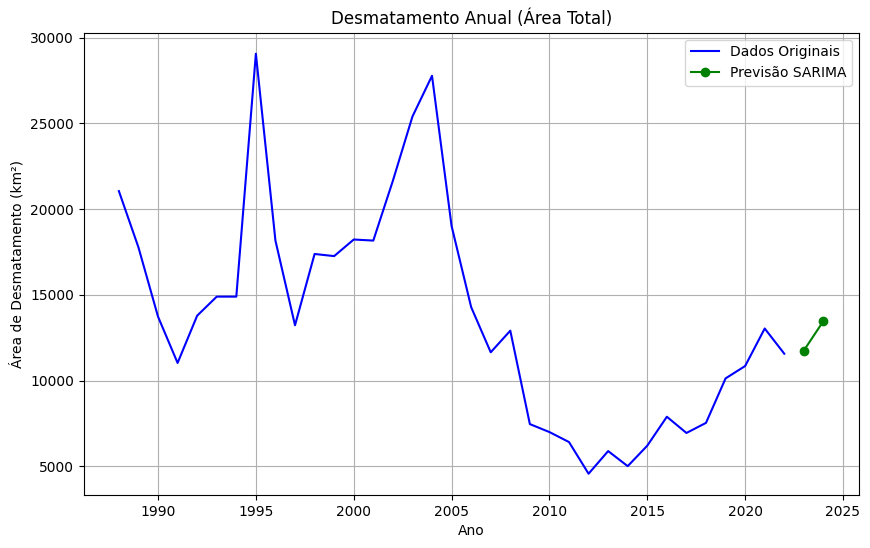

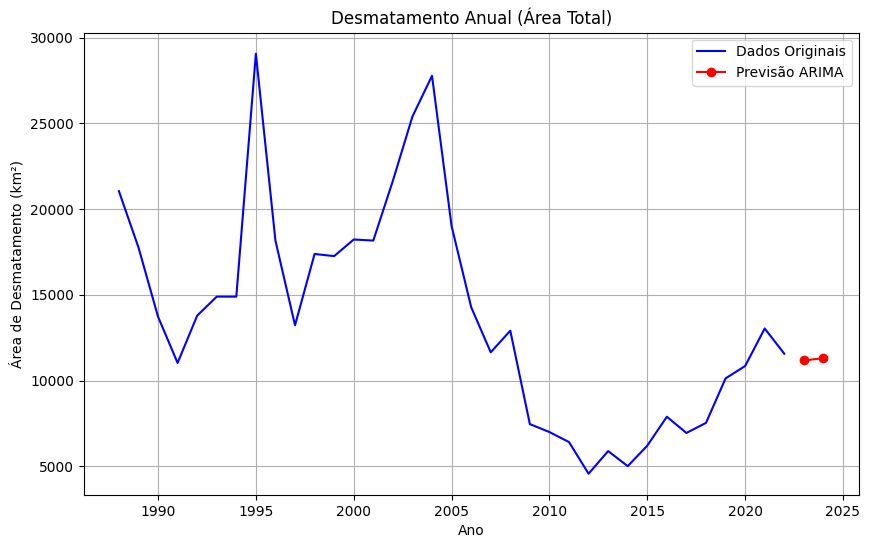

Epoch 1/100
2/2 [==============================] - 4s 16ms/step - loss: 0.2171
Epoch 2/100
2/2 [==============================] - 0s 0s/step - loss: 0.2124
Epoch 3/100
2/2 [==============================] - 0s 9ms/step - loss: 0.2079
Epoch 4/100
2/2 [==============================] - 0s 11ms/step - loss: 0.2039
Epoch 5/100
2/2 [==============================] - 0s 8ms/step - loss: 0.2000
Epoch 6/100
2/2 [==============================] - 0s 14ms/step - loss: 0.1962
Epoch 7/100
2/2 [==============================] - 0s 12ms/step - loss: 0.1925
Epoch 8/100
2/2 [==============================] - 0s 4ms/step - loss: 0.1887
Epoch 9/100
2/2 [==============================] - 0s 12ms/step - loss: 0.1850
Epoch 10/100
2/2 [==============================] - 0s 3ms/step - loss: 0.1814
Epoch 11/100
2/2 [==============================] - 0s 12ms/step - loss: 0.1780
Epoch 12/100
2/2 [==============================] - 0s 16ms/step - loss: 0.1748
Epoch 13/100
2/2 [==============================] - 0s 

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima.model import ARIMA
from sklearn.preprocessing import MinMaxScaler  # Importando MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

df = pd.read_csv('C:\\Users\\Vc682\\Downloads\\desmatamento\\desmatamento_prodes.csv')

modelo_sarima = SARIMAX(df['area_total_desmatamento'], order=(5,1,0), seasonal_order=(1,1,1,12))
resultado_sarima = modelo_sarima.fit()

previsao_sarima = resultado_sarima.forecast(steps=2)
print("Previsões SARIMA:")
print("2023:", list(previsao_sarima)[0])
print("2024:", list(previsao_sarima)[1])

modelo_arima = ARIMA(df['area_total_desmatamento'], order=(5,1,0))
resultado_arima = modelo_arima.fit()
previsao_arima = resultado_arima.forecast(steps=2)
print("\nPrevisões ARIMA:")
print("2023:", list(previsao_arima)[0])
print("2024:", list(previsao_arima)[1])

plt.figure(figsize=(10, 6))
plt.plot(df['referencia'], df['area_total_desmatamento'], label='Dados Originais', color='blue')
plt.plot([2023, 2024], previsao_sarima, label='Previsão SARIMA', color='green', marker='o')
plt.title('Desmatamento Anual (Área Total)')
plt.xlabel('Ano')
plt.ylabel('Área de Desmatamento (km²)')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(df['referencia'], df['area_total_desmatamento'], label='Dados Originais', color='blue')
plt.plot([2023, 2024], previsao_arima, label='Previsão ARIMA', color='red', marker='o')
plt.title('Desmatamento Anual (Área Total)')
plt.xlabel('Ano')
plt.ylabel('Área de Desmatamento (km²)')
plt.legend()
plt.grid(True)
plt.show()

X = df['referencia'].values.reshape(-1, 1)
y = df['area_total_desmatamento'].values
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
y_scaled = scaler.fit_transform(y.reshape(-1, 1)).flatten()
X_train = X_scaled[:-2]
y_train = y_scaled[:-2]
model = Sequential([
    LSTM(units=50, activation='relu', input_shape=(X_train.shape[1], 1)),
    Dense(units=1)
])
model.compile(optimizer='adam', loss='mean_squared_error'
model.fit(X_train, y_train, epochs=100, batch_size=32)
X_future = np.array([[2023], [2024]])
X_future_scaled = scaler.transform(X_future)
X_future_reshaped = X_future_scaled.reshape((X_future_scaled.shape[0], X_future_scaled.shape[1], 1))
previsao_rnn = model.predict(X_future_reshaped)
previsao_2023_rnn = scaler.inverse_transform(previsao_rnn[0].reshape(-1, 1)).flatten()[0]
previsao_2024_rnn = scaler.inverse_transform(previsao_rnn[1].reshape(-1, 1)).flatten()[0]
print("\nPrevisões Redes Neurais Recorrentes (LSTM):")
print("2023:", previsao_2023_rnn)
print("2024:", previsao_2024_rnn)